In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import zero_one_loss
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier       # Used in 2D data problems
from sklearn.linear_model import LogisticRegression  # Used in MNIST data problem
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')
import re
import requests           # we'll use these for reading data from a url
from io import StringIO
seed = 1234
np.random.seed(seed)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/christopher/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christopher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('train.csv')
print(df.columns)
print(np.mean(df["toxic"], axis = 0))
print(np.mean(df["severe_toxic"], axis = 0))
print(np.mean(df["obscene"], axis = 0))
print(np.mean(df["threat"], axis = 0))
print(np.mean(df["insult"], axis = 0))
print(len(df))
is_toxic = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] == 0).all(axis=1)
not_toxic = [d for d in range(0, len(df)) if is_toxic[d]]
toxic = [d for d in range(0, len(df)) if not is_toxic[d]]

X_train, X_test, Y_train, Y_test = train_test_split(df["comment_text"],is_toxic)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')
0.09584448302009764
0.009995550569965721
0.052948217407925
0.002995531769557125
0.04936360616904074
159571


([<matplotlib.patches.Wedge at 0x33d1e06b0>,
 [Text(-1.0443548066304753, 0.3454316688837642, 'Not Harmful'),
  Text(1.0443548389721178, -0.34543157110420913, 'Harmful')],
 [Text(-0.5696480763438956, 0.18841727393659866, '89.8%'),
  Text(0.5696480939847914, -0.18841722060229588, '10.2%')])

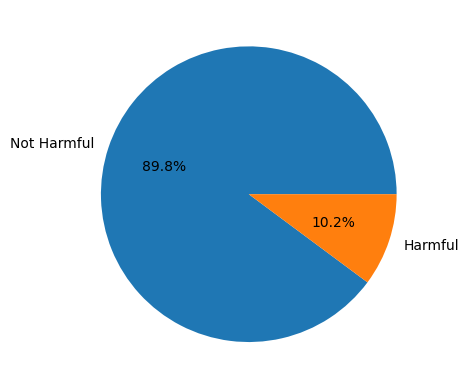

In [4]:
sizes = [len(not_toxic), len(toxic)]
labels = ["Not Harmful", "Harmful"]
plt.pie(sizes, labels = labels, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x34db8fc80>,
 [Text(0.2205229793508023, 1.0776686019265134, 'Toxic'),
  Text(-1.0627685713534702, 0.28376568457673707, 'Severe Toxic'),
  Text(-0.88354481837012, -0.655246941184247, 'Obscene'),
  Text(-0.1465638198299719, -1.0901922063181555, 'Threat'),
  Text(0.6339460365091164, -0.8989507343533251, 'Insult'),
  Text(1.0913128295372536, -0.1379721279367442, 'Identity Hate')],
 [Text(0.12028526146407398, 0.5878192374144617, '43.6%'),
  Text(-0.5796919480109837, 0.15478128249640202, '4.5%'),
  Text(-0.48193353729279265, -0.35740742246413465, '24.1%'),
  Text(-0.0799439017254392, -0.5946502943553574, '1.4%'),
  Text(0.3457887471867907, -0.49033676419272265, '22.4%'),
  Text(0.5952615433839564, -0.0752575243291332, '4.0%')])

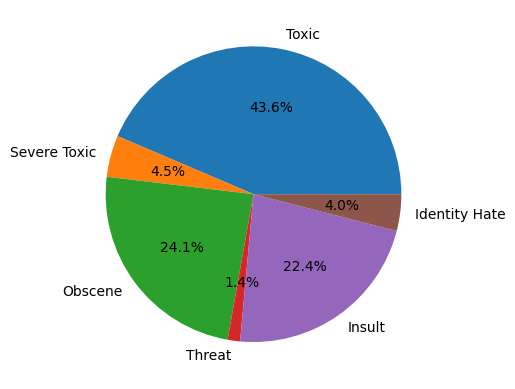

In [5]:

toxicVals = [d for d in range(0, len(df)) if df["toxic"][d] == 1]
sevtoxicVals = [d for d in range(0, len(df)) if df["severe_toxic"][d] == 1]
obsVals = [d for d in range(0, len(df)) if df["obscene"][d] == 1]
threVals = [d for d in range(0, len(df)) if df["threat"][d] == 1]
insVals = [d for d in range(0, len(df)) if df["insult"][d] == 1]
ihVals = [d for d in range(0, len(df)) if df["identity_hate"][d] == 1]
sizes2 = [len(toxicVals), len(sevtoxicVals), len(obsVals), len(threVals), len(insVals), len(ihVals)]
labels2 = [ "Toxic", "Severe Toxic", "Obscene", "Threat", "Insult", "Identity Hate"]
plt.pie(sizes2, labels = labels2, autopct='%.1f%%')

In [6]:
swords = stopwords.words("english")
swords.append("im")
#swords = ["the", "i", "im", "them", "my"]

def modify_input(tokens):
    new_list = []
    for token in tokens:
        if token not in swords:
            word = re.sub(r'[^A-Za-z0-9\s]', '', token)
            if(len(word) > 0):
                new_list.append(word)
    return new_list


In [7]:

tokens = [word_tokenize(sen.lower().strip()) for sen in X_train]
clean_tokens = []
for token_list in tokens:
    clean_tokens.append(modify_input(token_list))

# vectorizer = CountVectorizer()
# tokenizer = [" ".join(word_tokenize(sen.lower())) for sen in sentence]
# # Fit and transform text column
# X = vectorizer.fit_transform(tokenizer)
# #print(sentence)
# print("Feature Matrix Shape:", vectorizer.get_feature_names_out()) 



In [8]:
print(clean_tokens[1])

['it', 'report', 'major', 'report', 'political', 'killings', 'government', 's', 'side', 'make', 'article', 'balance', 'iteam', 'report', 'political', 'killings', 'official', 'unintended', 'policy']


In [9]:

# print(len(toxic))
# print(len(not_toxic))
# for i in range(0,10):
#     print(toxic[i])
#     print(df['comment_text'][toxic[i]])

print(is_toxic)

0         True
1         True
2         True
3         True
4         True
          ... 
159566    True
159567    True
159568    True
159569    True
159570    True
Length: 159571, dtype: bool


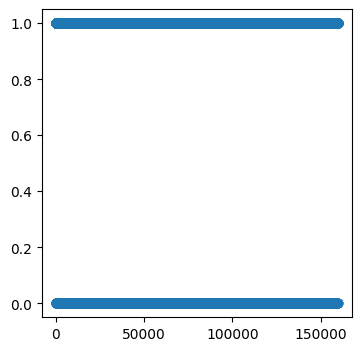

In [10]:
plt.figure(figsize=(4,4))
plt.scatter(range(0,len(is_toxic)), is_toxic)


In [11]:



learner = SGDClassifier(loss='hinge',             # hinge loss = primal linear SVM form
                         # small L2 regularization is "closest" to Hard SVM
              learning_rate='optimal',eta0=1e-3, # same optmization as before
              max_iter=5000,n_iter_no_change=5)
vectorizer = CountVectorizer()
tokenizer = [" ".join(sen) for sen in clean_tokens]
# Fit and transform text column
train_vectorize = vectorizer.fit_transform(tokenizer)



In [12]:
learner.fit(train_vectorize, Y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,5000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [13]:

predictions = learner.predict(vectorizer.transform(X_test))
score = accuracy_score(Y_test, predictions)
score_rec = recall_score(Y_test, predictions)
score_f = f1_score(Y_test, predictions)
score_prec = precision_score(Y_test, predictions)

print(score)
print(score_rec)
print(score_f)
print(score_prec)

0.9538264858496478
0.9933772991624231
0.9748498088476243
0.9570007774173659


In [14]:
predictions = learner.predict(vectorizer.transform(X_train))
score = accuracy_score(Y_train, predictions)
score_rec = recall_score(Y_train, predictions)
score_f = f1_score(Y_train, predictions)
score_prec = precision_score(Y_train, predictions)

print(score)
print(score_rec)
print(score_f)
print(score_prec)

0.9622904794531995
0.9971883175525328
0.979366973441779
0.9621714367847068


In [15]:
def test_comment(comment):
    comment_vector = vectorizer.transform([comment])
    prediction = learner.predict(comment_vector) 
    if prediction[0] == 0: 
        print("Harmful comment detected.")
    else:
        print("Comment is not harmful.")

test_comment("Nicey flowers everywhere!")
test_comment("Gonna kick your ass, motherfucker!")
test_comment("Gonna kick your ass")
test_comment("those stupid slaves")

Comment is not harmful.
Harmful comment detected.
Harmful comment detected.
Harmful comment detected.


In [42]:
learner2 = LogisticRegression(random_state=1234, max_iter = 500,tol = 1e-3, C = 0.45)

vectorizer = CountVectorizer()
tokenizer = [" ".join(sen) for sen in clean_tokens]
# Fit and transform text column
train_vectorize = vectorizer.fit_transform(tokenizer)
learner2.fit(train_vectorize, Y_train)

LogisticRegression(C=0.45, max_iter=500, random_state=1234, tol=0.001)

In [47]:
predictions = learner2.predict(vectorizer.transform(X_test))
score = accuracy_score(Y_test, predictions)
score_rec = recall_score(Y_test, predictions)
score_f = f1_score(Y_test, predictions)
score_prec = precision_score(Y_test, predictions)

print(score)
print(score_rec)
print(score_f)
print(score_prec)

0.9544280951545384
0.9907894370704288
0.9751061207722853
0.9599115736122719


In [48]:
predictions = learner2.predict(vectorizer.transform(X_train))
score = accuracy_score(Y_train, predictions)
score_rec = recall_score(Y_train, predictions)
score_f = f1_score(Y_train, predictions)
score_prec = precision_score(Y_train, predictions)

print(score)
print(score_rec)
print(score_f)
print(score_prec)

0.961095606544227
0.9940880186948952
0.9786621693461165
0.9637077485446094


In [54]:
def test_comment(comment):
    comment_vector = vectorizer.transform([comment])
    prediction = learner2.predict(comment_vector) 
    if prediction[0] == 0: 
        print("Harmful comment detected.")
    else:
        print("Comment is not harmful.")
test_comment("Nicey flowers everywhere!")
test_comment("Gonna kick your ass, motherfucker!")
test_comment("Gonna kick your ass")
test_comment("you are a chink")

Comment is not harmful.
Harmful comment detected.
Harmful comment detected.
Comment is not harmful.


In [137]:
### from sklearn.tree import DecisionTreeClassifier
learner3 = DecisionTreeClassifier()
learner3.fit(train_vectorize, Y_train)

DecisionTreeClassifier()

In [138]:
predictions = learner3.predict(vectorizer.transform(X_test))
score = accuracy_score(Y_test, predictions)
score_rec = recall_score(Y_test, predictions)
score_f = f1_score(Y_test, predictions)
score_prec = precision_score(Y_test, predictions)

print(score)
print(score_rec)
print(score_f)
print(score_prec)

0.9392123931516807
0.9672263976977452
0.9661601149858361
0.9650961806523557


In [159]:
from sklearn.ensemble import BaggingClassifier
learner3 = DecisionTreeClassifier(max_depth =150)
learner3.fit(train_vectorize, Y_train)
learner4= BaggingClassifier(learner3, n_estimators=10, random_state=seed)



In [160]:
learner4.fit(train_vectorize, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=150),
                  random_state=1234)

In [161]:
predictions = learner4.predict(vectorizer.transform(X_test))
score = accuracy_score(Y_test, predictions)
score_rec = recall_score(Y_test, predictions)
score_f = f1_score(Y_test, predictions)
score_prec = precision_score(Y_test, predictions)

print(score)
print(score_rec)
print(score_f)
print(score_prec)

0.9501917629659339
0.9804140705764018
0.972466639876952
0.9646470200131955


In [162]:
predictions = learner4.predict(vectorizer.transform(X_train))
score = accuracy_score(Y_train, predictions)
score_rec = recall_score(Y_train, predictions)
score_f = f1_score(Y_train, predictions)
score_prec = precision_score(Y_train, predictions)

print(score)
print(score_rec)
print(score_f)
print(score_prec)

0.9745650829726432
0.9961229138580261
0.9859930057058716
0.9760670523390881
